In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
# Reading data into notebook
data = pd.read_csv('data.csv')
print(data.shape)

# No missing values.
# Most columns datatype is of float
# Last column in a string
data.info()

(2140, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-n

In [3]:
#### Image values are given as a list of strings. Reshaping the data to 96x96
data['Image_reshaped'] = data.Image.apply(lambda row:np.array(row.split(' ')).astype('int').reshape(96,96))
data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


### Image Visualization

In [ ]:
figure = plt.figure(figsize=(20,20))        # choosing the figure size for the entire plot

for i in range(30):
    ax = figure.add_subplot(5,6,i+1)         # to above figure size, choosing the display of subplots
    k = np.random.randint(len(data))              # Displays random set of images for every run
    img = plt.imshow(data.Image_reshaped[k],cmap='gray')   # plots grayscale image
    for factor in range(0,data.shape[1]-2,2):
        plt.plot(data.loc[k][factor],data.loc[k][factor+1],'r*')       # key facial factors for every image displayed

: 

: 

#### Image Augmentation 

##### 1. Horizontal Flipping - Along Y Axis

In [4]:
data_copy = data.copy()
data_copy['Image'] = data_copy['Image_reshaped'].apply(lambda i: np.flip(i,axis=1)) # axis 1 means y axis. Flips every row of image data horizonataly

# Flipping along y axis keeps the y coordinates the same while the x coordinates become exactly opp in sign
# Taking all the columns other than the last 2 because the last 2 are the combined list of all pixel values
clmns = data_copy.columns[:-2]
for i in range(len(clmns)):
    if i%2 == 0:
        data_copy[clmns[i]] = data_copy[clmns[i]].apply(lambda i: 96. - i)         # in the maximum length of the image

(4280, 32)


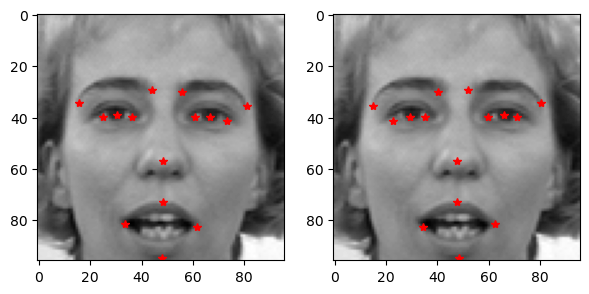

In [5]:
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(1,2,1)
plt.imshow(data['Image_reshaped'][11],cmap = 'gray')
for factor in range(0,data.shape[1]-2,2):
        plt.plot(data.loc[11][factor],data.loc[11][factor+1],'r*')       # key facial factors for every image displayed

ax = fig.add_subplot(1,2,2)
plt.imshow(data_copy['Image_reshaped'][11],cmap = 'gray')
for factor in range(0,data_copy.shape[1]-2,2):
        plt.plot(data_copy.loc[11][factor],data_copy.loc[11][factor+1],'r*')       # key facial factors for every image displayed


df_augmented = pd.concat([data,data_copy])             # adding both dataframes
print(df_augmented.shape)

##### 2. Adding Brightened versions of Images

In [6]:

data_copy = data.copy()

# multiplying each pixel value with any random value between 1 and 2 to brighten the image
# clip image values between 0 and 255
data_copy['Image_reshaped'] = data_copy['Image_reshaped'].apply(lambda i:np.clip( random.uniform(1,2)*i ,0.0,255.0))
df_augmented = pd.concat([df_augmented,data_copy],axis=0)
print(df_augmented.shape)

(6420, 32)


##### 3. Adding Dimmed versions of Images

In [7]:
# Reducing brightness
data_copy = data.copy()
# multiplying each pixel value with any random value between 0 and 1 to dim the image
# clip image values between 0 and 255
data_copy['Image_reshaped'] = data_copy['Image_reshaped'].apply(lambda i: np.clip( random.uniform(0,1)*i , 0.0, 255.0))
df_augmented = pd.concat([df_augmented,data_copy],axis = 0)
print(df_augmented.shape)

(8560, 32)


###### Image Augmentation along X Axis

In [8]:
# # Flipping vertically won't change x coordinates but the y coordinates will be -y

# data_copy = data.copy()

# data_copy['Image_reshaped'] = data_copy['Image_reshaped'].apply(lambda i: np.flip(i,axis=0))   # axis 0 is X axis

# # Flipping along x axis keeps the x coordinates the same while the y coordinates become exactly opp in sign
# clmns = data_copy.columns[:-2]
# for i in range(len(clmns)):
#     if i%2 != 0:
#         data_copy[clmns[i]] = data_copy[clmns[i]].apply(lambda i: 96. - i)         # in the maximum length of the image

In [9]:
# fig = plt.figure(figsize = (7,7))

# ax = fig.add_subplot(1,2,1)
# plt.imshow(data['Image_reshaped'][11],cmap = 'gray')
# for factor in range(0,data.shape[1]-2,2):
#         plt.plot(data.loc[11][factor],data.loc[11][factor+1],'r*')       # key facial factors for every image displayed

# ax = fig.add_subplot(1,2,2)
# plt.imshow(data_copy['Image_reshaped'][11],cmap = 'gray')
# for factor in range(0,data_copy.shape[1]-2,2):
#         plt.plot(data_copy.loc[11][factor],data_copy.loc[11][factor+1],'r*')       # key facial factors for every image displayed


# df_augmented = pd.concat([data,data_copy])             # adding both dataframes

##### Data Normalization & Data Preparation

In [10]:
df_augmented.reset_index(inplace = True,drop = True)        # resetting index due to duplicate indices as we performed augmentation
imgdata = df_augmented.iloc[:,-1]
imgdata = imgdata/255          # data normalized to a scale of 0 to 1

# Input array matches dimension of data - (8560,96,96,1)
X = np.empty((len(imgdata),96,96,1))

for i in range(len(imgdata)):
    X[i,] = np.expand_dims(imgdata[i],axis=2)

X = np.asarray(X).astype('float')           # Input data
X.shape

(8560, 96, 96, 1)

In [11]:
# Getting the target values which are the 15 key facial points. Totally 30 coordinate points

y = df_augmented.iloc[:,:-2]
y = np.asarray(y).astype('float')         # Data points should be in float value as it is more sutiable for neural networks
y.shape

(8560, 30)

In [12]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep='\n')

(7704, 96, 96, 1)
(7704, 30)
(856, 96, 96, 1)
(856, 30)


##### Building the Model